# **TITANIC DATASET**
# **Exercise 1: Evaluating Logistic Regression with Cross-Validation**

In [5]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv(list(uploaded.keys())[0])
print(data.head())
print(data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [7]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
data = data.dropna(subset=[target])

In [8]:
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Pclass', 'Sex', 'Embarked']

In [9]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  ('cat', categorical_transformer, categorical_features)
    ])

In [11]:
# Apply Transformations
X = data[features]
y = data[target]

X_preprocessed = preprocessor.fit_transform(X)

# Defining Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

In [12]:
# Evaluate the model using k-fold cross-validation
from sklearn.model_selection import cross_val_score
k = 5
cv_scores = cross_val_score(logreg, X_preprocessed, y, cv=k)

print(f"Cross-validation scores (k={k}): {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores (k=5): [0.7877095  0.78651685 0.78651685 0.76966292 0.83146067]
Mean cross-validation score: 0.7923733601154981


In [13]:
# Spliting into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Train the model on the training set
logreg.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = logreg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test set accuracy: {test_accuracy}")

Test set accuracy: 0.7988826815642458


# **Exercise 2: Analyzing Overfitting and Underfitting in Decision Trees**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Lists to store accuracies
train_accuracies = []
test_accuracies = []

# Range of depths to test
depths = list(range(1, 21))

In [15]:
# Train and evaluate Decision Tree classifier with varying depths
for depth in depths:
    data = DecisionTreeClassifier(max_depth=depth, random_state=42)
    data.fit(X_train, y_train)

    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train, data.predict(X_train))
    train_accuracies.append(train_accuracy)

    # Calculate testing accuracy
    test_accuracy = accuracy_score(y_test, data.predict(X_test))
    test_accuracies.append(test_accuracy)

In [16]:
print(f"Depths: {len(depths)}, Train Accuracies: {len(train_accuracies)}, Test Accuracies: {len(test_accuracies)}")
print(f"Depths: {depths}")

Depths: 20, Train Accuracies: 20, Test Accuracies: 20
Depths: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


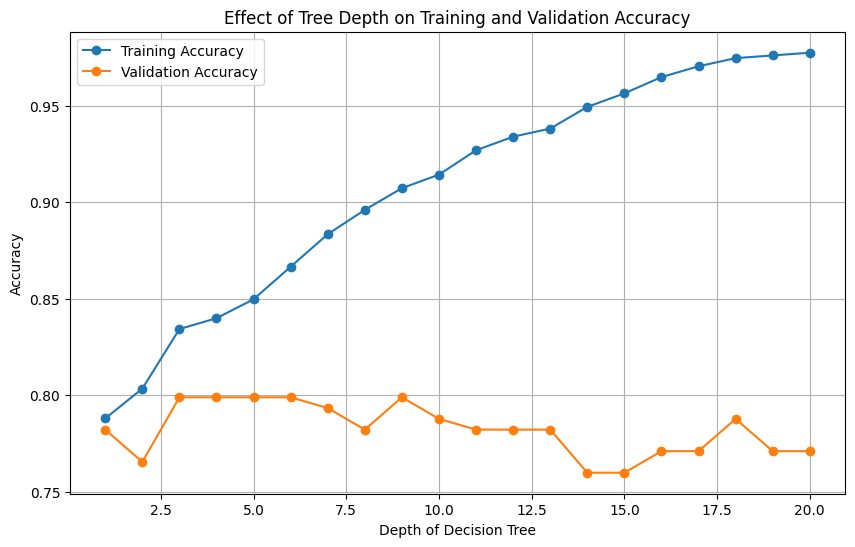

In [17]:
# Plotting Accuracies
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Effect of Tree Depth on Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# **Exercise 3: Calculating Precision, Recall, and F1-Score for Logistic Regression**

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
y_pred = logreg.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [19]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# full classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Precision: 0.7794117647058824
Recall: 0.7162162162162162
F1-Score: 0.7464788732394366

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# **Exercise 4: ROC Curve Analysis for Decision Trees**

In [21]:
from sklearn.metrics import roc_curve, auc

# Predict the probabilities for the positive class
y_probs = data.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

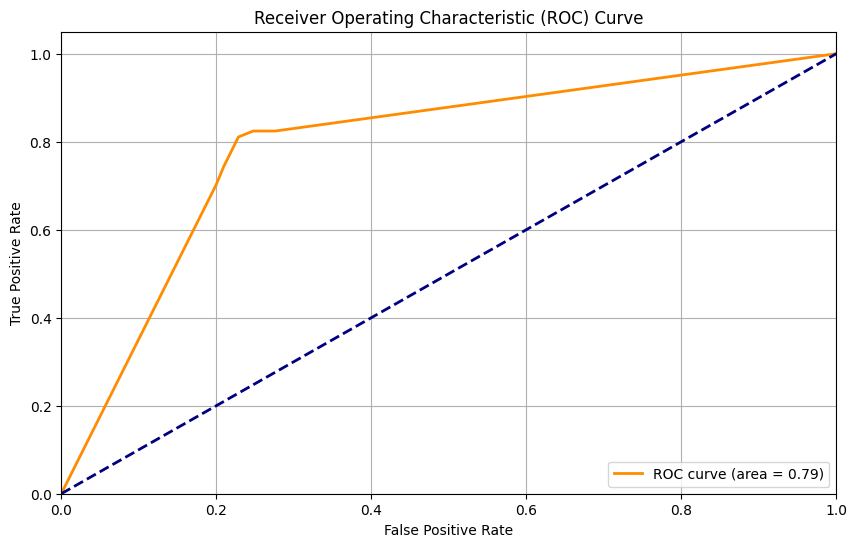

In [22]:
# ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [23]:
# Print AUC
print(f"AUC (Area Under the Curve): {roc_auc:.2f}")

AUC (Area Under the Curve): 0.79


# **Exercise 5: Comparing Model Performance with and without Cross-Validation**

**Logistic Regression and Decision Tree with Cross-Validation**

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score

logreg = LogisticRegression(max_iter=1000, random_state=42)
data = DecisionTreeClassifier(random_state=42)

In [25]:
# Logistic Regression with cross-validation
logreg_cv_scores = cross_val_score(logreg, X_preprocessed, y, cv=5)
logreg_cv_precision = cross_val_score(logreg, X_preprocessed, y, cv=5, scoring='precision')
logreg_cv_recall = cross_val_score(logreg, X_preprocessed, y, cv=5, scoring='recall')

In [26]:
# Decision Tree with cross-validation
data_cv_scores = cross_val_score(data, X_preprocessed, y, cv=5)
data_cv_precision = cross_val_score(data, X_preprocessed, y, cv=5, scoring='precision')
data_cv_recall = cross_val_score(data, X_preprocessed, y, cv=5, scoring='recall')

In [35]:
# Cross-validation metrics
print(f"Logistic Regression - CV Accuracy: {logreg_cv_scores.mean()} ± {logreg_cv_scores.std()}")
print(f"Logistic Regression - CV Precision: {logreg_cv_precision.mean()} ± {logreg_cv_precision.std()}")
print(f"Logistic Regression - CV Recall: {logreg_cv_recall.mean()} ± {logreg_cv_recall.std()}")

print(f"\nDecision Tree - CV Accuracy: {data_cv_scores.mean()} ± {data_cv_scores.std()}")
print(f"Decision Tree - CV Precision: {data_cv_precision.mean()} ± {data_cv_precision.std()}")
print(f"Decision Tree - CV Recall: {data_cv_recall.mean()} ± {data_cv_recall.std()}")

Logistic Regression - CV Accuracy: 0.7923733601154981 ± 0.02065880487624462
Logistic Regression - CV Precision: 0.7493109651976727 ± 0.04094392439408363
Logistic Regression - CV Recall: 0.6928815004262575 ± 0.03792877102567304

Decision Tree - CV Accuracy: 0.7800577490427469 ± 0.03534724663043766
Decision Tree - CV Precision: 0.7124374986086066 ± 0.04051199438090708
Decision Tree - CV Recall: 0.7134271099744245 ± 0.06411804888782473


**Logistic Regression and Decision Tree without Cross-Validation**

In [31]:
logreg.fit(X_train, y_train)
data.fit(X_train, y_train)

logreg_y_pred = logreg.predict(X_test)
data_y_pred = data.predict(X_test)

In [32]:
# Without Cross-Validation Metrics
logreg_accuracy = accuracy_score(y_test, logreg_y_pred)
logreg_precision = precision_score(y_test, logreg_y_pred)
logreg_recall = recall_score(y_test, logreg_y_pred)

data_accuracy = accuracy_score(y_test, data_y_pred)
data_precision = precision_score(y_test, data_y_pred)
data_recall = recall_score(y_test, data_y_pred)

In [34]:
print(f"Logistic Regression - Test Accuracy: {logreg_accuracy}")
print(f"Logistic Regression - Test Precision: {logreg_precision}")
print(f"Logistic Regression - Test Recall: {logreg_recall}")

print(f"\nDecision Tree - Test Accuracy: {data_accuracy}")
print(f"Decision Tree - Test Precision: {data_precision}")
print(f"Decision Tree - Test Recall: {data_recall}")

Logistic Regression - Test Accuracy: 0.7988826815642458
Logistic Regression - Test Precision: 0.7794117647058824
Logistic Regression - Test Recall: 0.7162162162162162

Decision Tree - Test Accuracy: 0.770949720670391
Decision Tree - Test Precision: 0.7088607594936709
Decision Tree - Test Recall: 0.7567567567567568
